<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

In [8]:
pip install tensorflow

     |████████████████████████████████| 195.7 MB 45 kB/s  eta 0:00:01     |█████████████████               | 103.5 MB 977 kB/s eta 0:01:35     |████████████████████████▍       | 149.4 MB 994 kB/s eta 0:00:47███████████████       | 153.0 MB 632 kB/s eta 0:01:08�█████████████████████      | 158.5 MB 946 kB/s eta 0:00:40
     |████████████████████████████████| 462 kB 3.7 MB/s eta 0:00:01
     |████████████████████████████████| 132 kB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 3.7 MB 4.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 3.7 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 6.0 MB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 4.9 MB/s eta 0:00:01
   

# Lab 9.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [14]:
# insert code here
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split

In [15]:
## Import libraries
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# import keras
from keras.models import Sequential
from keras.layers import Dense
#from keras.utils import to_categorical
import keras.utils

### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [16]:
# insert code here
diabetes_data = datasets.load_diabetes()
diabetes_df = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)

diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


### Prepare input data

In [57]:
# insert code here
X = diabetes_df.values

y = diabetes_data.target

In [60]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

### Split the data (training/test)

In [18]:
# insert code here

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Create the model's architecture

In [19]:
# insert code here

In [20]:
# Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid Function
def sigmoid_derivative(x):
    return x * (1 - x)

# ReLU Function
def relu(x):
    return np.max(0, x)

# Derivative of ReLU Function
def relu_derivative(x):
    return 0 if x < 0 else 1

In [45]:
n_cols = X.shape[1]
# Set up the model architecture
model = Sequential()
# Add the first hidden layer
model.add(Dense(100, activation = 'relu', input_shape = (n_cols, )))
# Add the second hidden layer
model.add(Dense(50, activation = 'relu'))

# Add the output layer
model.add(Dense(10, activation = 'softmax'))

### Compile the model

In [46]:
# insert code here

In [47]:
model.compile(
    optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

### Fit the training data

In [48]:
%%time
# insert code here

history = model.fit(
    X_train,
    y_train,
    validation_split = 0.25,
    batch_size = 20,
    epochs = 100,
    verbose = 1)

Epoch 1/100
14/14 [==============================] - 5s 42ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+0

Epoch 58/100
14/14 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 59/100
14/14 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 60/100
14/14 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 61/100
14/14 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 62/100
14/14 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 63/100
14/14 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 64/100
14/14 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0

### Create predictions

In [49]:
# insert code here
predictions = model.predict_classes(X_test)

/opt/anaconda3/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

### Evaluate the model

In [50]:
# insert code here
score = model.evaluate(X_test, y_test, batch_size = 315)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

1/1 [==============================] - 0s 19ms/step - loss: nan - accuracy: 0.0000e+00

Test loss: nan, Test accuracy: 0.000000


### Visualisation of cost

In [0]:
# insert code here

In [51]:
def print_cm(cm):
    c = '%%%dd ' % len('%d' % cm.max())
    s = ' | '
    s += ''.join([c % i for i in range(len(cm[0]))])
    print(s)
    print('-' * len(s))
    for i, r in enumerate(cm):
        s = '%d| ' % i
        s += c * len(r)
        print(s % tuple(r))

KeyError: 'accuracy'

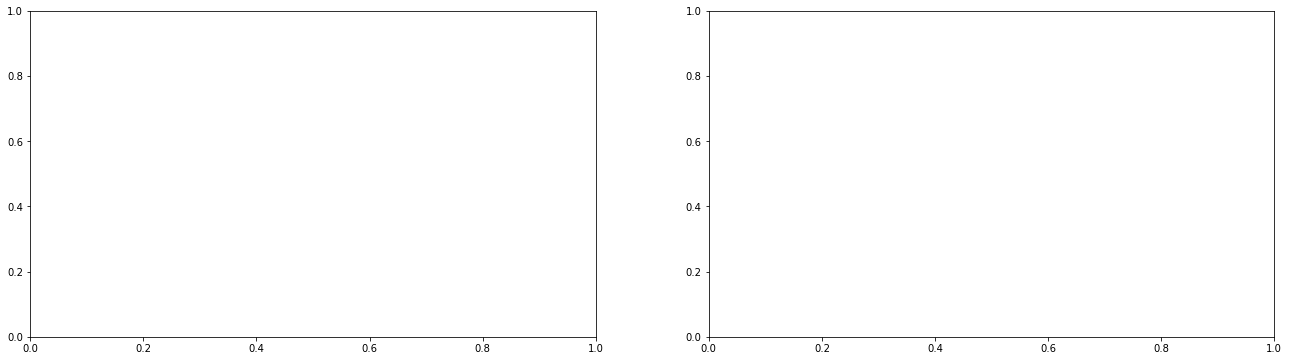

In [52]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(model.history.history['accuracy'], label = 'Training')
ax[0].plot(model.history.history['val_accuracy'], label = 'Validation')
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(model.history.history['loss'], label = 'Training')
ax[1].plot(model.history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

### Visualisation of residuals

In [56]:
# insert code here
residuals = y_test-predictions
residuals

array([[ 67., 275., 175., ..., 101.,  95., 208.],
       [ 67., 275., 175., ..., 101.,  95., 208.],
       [ 67., 275., 175., ..., 101.,  95., 208.],
       ...,
       [ 67., 275., 175., ..., 101.,  95., 208.],
       [ 67., 275., 175., ..., 101.,  95., 208.],
       [ 67., 275., 175., ..., 101.,  95., 208.]])

(89, 1)



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



